In [1]:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as r
import seaborn as sns

In [2]:
# 시각화 작업에 필요한 라이브러리를 설치하고 import 한다
# !pip install matplotlib
import matplotlib as mpl
import matplotlib.font_manager as fm
# 한글 폰트를 사용할 때 마이너스 데이터가 깨져 보이는 문제를 해결한다
mpl.rcParams['axes.unicode_minus'] = False
# 그래프를 쥬티퍼 노트북 내부에 표시하기 위해 사용한다
%matplotlib inline 

In [3]:
# 그래프를 그리기 위해 더미 데이터를 만든다
data = np.random.randint(-100, 100, 50).cumsum()
data

array([-100, -163, -128,  -32, -122, -213, -302, -277, -366, -403, -370,
       -372, -393, -370, -286, -363, -339, -414, -383, -290, -267, -276,
       -282, -307, -372, -335, -370, -406, -469, -411, -452, -375, -279,
       -202, -298, -271, -223, -138,  -76, -140,  -74,  -19,  -61,  -30,
         63,   16,  -81, -102, -112,  -18], dtype=int32)

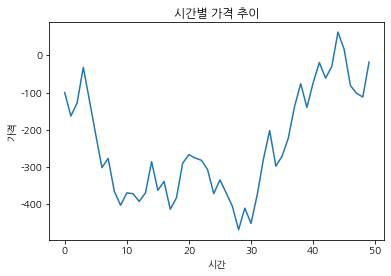

In [4]:
# matplotlib의 기본 폰트로 sans-serif가 지정되어 있기 때문에  한글이 깨져서 보인다
plt.plot(range(50), data)
plt.rcParams['figure.figsize'] = (12, 7) # [], () 가능 차트 크기
plt.title('시간별 가격 추이') # 차트 제목
plt.ylabel('가격') # y축 제목
plt.xlabel('시간') # x축 제목
plt.show()

In [5]:
# 폰트를 설정하에 앞서 matplotlib의 설정 정보(버전, 위치)를 확인한다
print('버전 : ', mpl.__version__)
print('설치 위치 : ', mpl.__file__)
print('설정 위치 : ', mpl.get_configdir())
print('캐시 위치 : ', mpl.get_cachedir())

버전 :  3.3.4
설치 위치 :  c:\python\lib\site-packages\matplotlib\__init__.py
설정 위치 :  C:\Users\한종민\.matplotlib
캐시 위치 :  C:\Users\한종민\.matplotlib


In [6]:
# matplotlib의 설정 파일 위치를 확인한다
print('설정 파일 위치 : ', mpl.matplotlib_fname())

설정 파일 위치 :  c:\python\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [7]:
# 컴퓨터에 설치된 폰트 목록을 얻어온다
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
print(len(font_list))
print(font_list[:10])

342
['C:\\WINDOWS\\Fonts\\seguihis.ttf', 'C:\\Windows\\Fonts\\taile.ttf', 'C:\\Windows\\Fonts\\segoeuil.ttf', 'C:\\WINDOWS\\Fonts\\HANBatangExtBB.ttf', 'C:\\Windows\\Fonts\\courbi.ttf', 'C:\\Windows\\Fonts\\constan.ttf', 'C:\\Windows\\Fonts\\JUMJA.TTF', 'C:\\Windows\\Fonts\\couri.ttf', 'C:\\Windows\\Fonts\\seguisym.ttf', 'C:\\Windows\\Fonts\\HANDotum.ttf']


In [8]:
font_list = [f.name for f in fm.fontManager.ttflist]
print(len(font_list))
print(font_list[:10])

368
['DejaVu Serif', 'STIXNonUnicode', 'STIXSizeOneSym', 'DejaVu Sans Display', 'DejaVu Sans', 'STIXSizeFourSym', 'STIXSizeFiveSym', 'cmsy10', 'DejaVu Serif Display', 'STIXGeneral']


In [9]:
# 나눔 글꼴을 사용할 예정이므로 이름에 'Nanum'이 포함된 폰트만 가져온다
font_list = [(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]
font_list

[('NanumGothic', 'C:\\Windows\\Fonts\\\x7f\x7f\x7f\x7fBOLD.TTF'),
 ('NanumGothic', 'C:\\Windows\\Fonts\\\x7f\x7f\x7f\x7f.TTF'),
 ('NanumGothic', 'C:\\WINDOWS\\Fonts\\\x7f\x7f\x7f\x7fBOLD.TTF'),
 ('NanumGothic', 'C:\\Windows\\Fonts\\\x7f\x7f\x7f\x7fEXTRABOLD.TTF'),
 ('NanumGothic', 'C:\\WINDOWS\\Fonts\\\x7f\x7f\x7f\x7f.TTF'),
 ('NanumGothic', 'C:\\WINDOWS\\Fonts\\\x7f\x7f\x7f\x7fEXTRABOLD.TTF')]

In [10]:
# 위의 실행한 결과 []로 나오면 캐시 폴더로 이동해 폴더의 모든 내용을 삭제한 후 해본다
# 그래두 안되면 아래의 식을 실행한다
# mpl.font_manger._rebuild()

한글 폰트를 사용하는 방법은 3가지가 있다

In [11]:
# 1. FontProperies를 사용하는 방법 => 그래프의 폰트가 필요한 항목마다 지정한다
# 텍스트를 지정하는 항목에 지정해서 사용할 수 있고 지정해준 항목에만 해당 폰트가 적용된다
# matplotlib.pyplot => title(), xlabel(), ylabel(), legend(), text()
# matplotlib.axes    => set_title()

# 한글 폰트 파일의 경로와 이름을 지정한다
font = 'C:\\Windows\\Fonts\\\x7f\x7f\x7f\x7f.TTF'
fontprop = fm.FontProperties(fname=font, size=15)

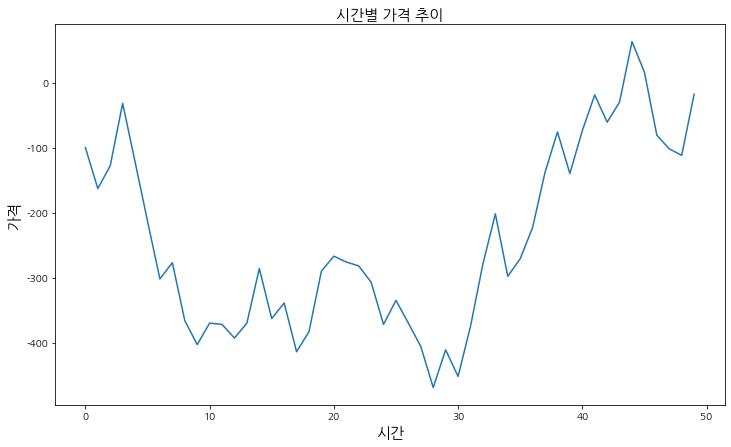

In [12]:
plt.plot(range(50), data)
plt.rcParams['figure.figsize'] = (12, 7) # [], () 가능 차트 크기
plt.title('시간별 가격 추이', fontproperties=fontprop) # 차트 제목
plt.ylabel('가격', fontproperties=fontprop) 
plt.xlabel('시간', fontproperties=fontprop) 
plt.show()

In [13]:
# 2. matplotlib 라이브러리의 rcParams[]로 전역 글꼴로 설정한다 => 쥬피터 노트북에서 파일을 실행할때마다
# 해줘야 한다
print('기본으로 설정된 폰트 크기 : ', plt.rcParams['font.size'])
print('기본으로 설정된 폰트 설정 : ', plt.rcParams['font.family'])

기본으로 설정된 폰트 크기 :  10.0
기본으로 설정된 폰트 설정 :  ['NanumGothic']


In [14]:
# 2-1
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'NanumGothic'

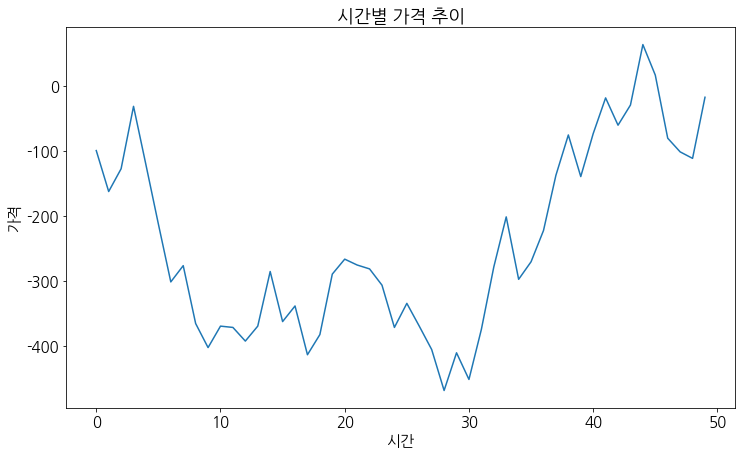

In [15]:
plt.plot(range(50), data)
plt.rcParams['figure.figsize'] = (12, 7) # [], () 가능 차트 크기
plt.title('시간별 가격 추이') 
plt.ylabel('가격') 
plt.xlabel('시간')
plt.show()

In [16]:
# 2-2
# rcParams[] 대신 FontProperties의 plt.rc를 사용하는 방법
font = 'C:\\Windows\\Fonts\\\x7f\x7f\x7f\x7f.TTF'
font_name = fm.FontProperties(fname=font, size=15).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic


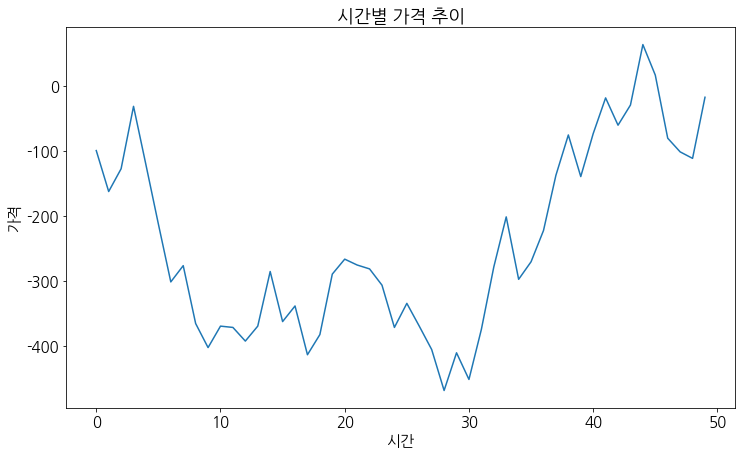

In [17]:
plt.plot(range(50), data)
plt.rcParams['figure.figsize'] = (12, 7) # [], () 가능 차트 크기
plt.title('시간별 가격 추이') # 차트 제목
plt.ylabel('가격') # y축 제목
plt.xlabel('시간') # x축 제목
plt.show()

In [18]:
# 3. rcParams를 matplotlib 설정 파일에 직접넣어준다 => 현재 컴퓨터의 모든 쥬피터 노트북에 적용된다
# font.family : NanumGothic
# 이곳에 폰트를 지정해주면 현재 컴퓨터에서 쥬피터 노트북을 실핼할때마다 바로 글꼴이 로드되도록 할 수 있다